<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lab)

***



Week 2 | Lesson 4.1

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!

ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [6]:
# Solution here
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [5]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

### 2. What is the breakdown of dtypes in our dataframe?

In [107]:
# Solution here
ufo['Shape Reported'].unique()

array(['TRIANGLE', 'OTHER', 'OVAL', 'DISK', 'LIGHT', 'CIRCLE', 'CIGAR',
       'CYLINDER', 'FIREBALL', 'SPHERE', nan, 'RECTANGLE', 'FORMATION',
       'FLASH', 'CHEVRON', 'EGG', 'CONE', 'DIAMOND', 'VARIOUS', 'TEARDROP',
       'CROSS', 'DELTA', 'ROUND', 'DOME', 'PYRAMID', 'CRESCENT', 'FLARE',
       'HEXAGON'], dtype=object)

In [13]:
ufo.dtypes


City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [34]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [17]:
ufo.count

<bound method DataFrame.count of                        City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
5               Valley City             NaN           DISK    ND   
6               Crater Lake             NaN         CIRCLE    CA   
7                      Alma             NaN           DISK    MI   
8                   Eklutna             NaN          CIGAR    AK   
9                   Hubbard             NaN       CYLINDER    OR   
10                  Fontana             NaN          LIGHT    CA   
11                 Waterloo             NaN       FIREBALL    AL   
12                   Belton             RED         SPHERE    SC   
13             

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

In [10]:
## Change this cell to a "markdown" type cell
ufo.columns
# City: object; city of ufo sighting
# Colors Reported: object, color of ufo
# Shape Reported: object, shape of ufo
# State: object, state of ufo sighting
# Time: date and time of ufo sighting


Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time'], dtype='object')

In [31]:
print ufo['Shape Reported'].unique()


['TRIANGLE' 'OTHER' 'OVAL' 'DISK' 'LIGHT' 'CIRCLE' 'CIGAR' 'CYLINDER'
 'FIREBALL' 'SPHERE' nan 'RECTANGLE' 'FORMATION' 'FLASH' 'CHEVRON' 'EGG'
 'CONE' 'DIAMOND' 'VARIOUS' 'TEARDROP' 'CROSS' 'DELTA' 'ROUND' 'DOME'
 'PYRAMID' 'CRESCENT' 'FLARE' 'HEXAGON']
[nan 'RED' 'GREEN' 'BLUE' 'ORANGE' 'YELLOW' 'ORANGE YELLOW' 'RED GREEN'
 'RED BLUE' 'RED ORANGE' 'RED GREEN BLUE' 'RED YELLOW GREEN' 'RED YELLOW'
 'GREEN BLUE' 'ORANGE GREEN BLUE' 'ORANGE GREEN' 'YELLOW GREEN'
 'RED YELLOW BLUE' 'ORANGE BLUE' 'RED YELLOW GREEN BLUE'
 'YELLOW GREEN BLUE' 'RED ORANGE YELLOW' 'RED ORANGE YELLOW BLUE'
 'YELLOW BLUE' 'RED ORANGE GREEN' 'RED ORANGE BLUE' 'ORANGE YELLOW GREEN'
 'ORANGE YELLOW BLUE' 'RED ORANGE GREEN BLUE' 'RED ORANGE YELLOW GREEN'
 'ORANGE YELLOW GREEN BLUE' 'RED ORANGE YELLOW GREEN BLUE']


### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [38]:
ufo.groupby(['Colors Reported'])[['State']].count().sort_values('State', ascending=0).head(10)


,State
Colors Reported,
ORANGE,5216
RED,4809
GREEN,1897
BLUE,1855
YELLOW,842
RED ORANGE,486
RED GREEN,469
RED BLUE,445
RED GREEN BLUE,166


### 4. Which shapes are most commonly reported?

In [37]:
ufo.groupby(['Shape Reported'])[['State']].count().sort_values('State', ascending=0).head(10)


,State
Shape Reported,
LIGHT,16332
TRIANGLE,7816
CIRCLE,7725
FIREBALL,6249
OTHER,5506
SPHERE,5231
DISK,5226
OVAL,3721
FORMATION,2405


### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [44]:
colbyshape = ufo.groupby(['Colors Reported','Shape Reported'])[['Shape Reported']].count().sort_values('Shape Reported', ascending=0)
colbyshape.head(30)

Shape Reported
Colors Reported Shape Reported                
RED             LIGHT                     1188
ORANGE          LIGHT                     1122
                FIREBALL                   884
                CIRCLE                     796
                SPHERE                     569
RED             TRIANGLE                   561
                CIRCLE                     548
BLUE            LIGHT                      403
GREEN           LIGHT                      378
RED             FIREBALL                   377
GREEN           FIREBALL                   353
RED             SPHERE                     335
ORANGE          TRIANGLE                   299
                OVAL                       236
RED             OTHER                      233
YELLOW          LIGHT                      208
RED             FORMATION                  207
ORANGE          FORMATION                  206
                OTHER                      199
BLUE            CIRCLE                     194
RED             OVAL                       191
                DISK                       187
GREEN           CIRCLE                     182
BLUE            SPHERE                     148
GREEN           SPHERE                     144
BLUE            FIREBALL                   142
ORANGE          DISK                       122
BLUE            TRIANGLE                   120
GREEN           OTHER                      116
BLUE            OTHER                      116

### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [48]:
ufo['Shape Reported'].unique()

array(['TRIANGLE', 'OTHER', 'OVAL', 'DISK', 'LIGHT', 'CIRCLE', 'CIGAR',
       'CYLINDER', 'FIREBALL', 'SPHERE', nan, 'RECTANGLE', 'FORMATION',
       'FLASH', 'CHEVRON', 'EGG', 'CONE', 'DIAMOND', 'VARIOUS', 'TEARDROP',
       'CROSS', 'DELTA', 'ROUND', 'DOME', 'PYRAMID', 'CRESCENT', 'FLARE',
       'HEXAGON'], dtype=object)

In [47]:
cig_mask = (ufo['Shape Reported'] == 'CIGAR')
ufo[cig_mask]

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

In [ ]:
ufo

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

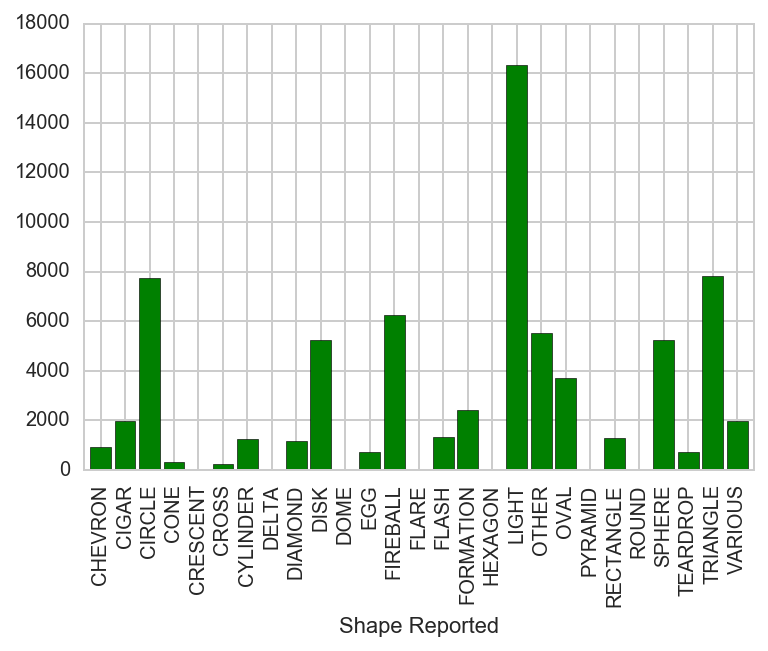

In [57]:
#ufo.groupby(['Shape Reported','State','Colors Reported']).count()
ufo.groupby(["Shape Reported"]).size().plot(kind='bar', color='g',width=0.85)
plt.show()

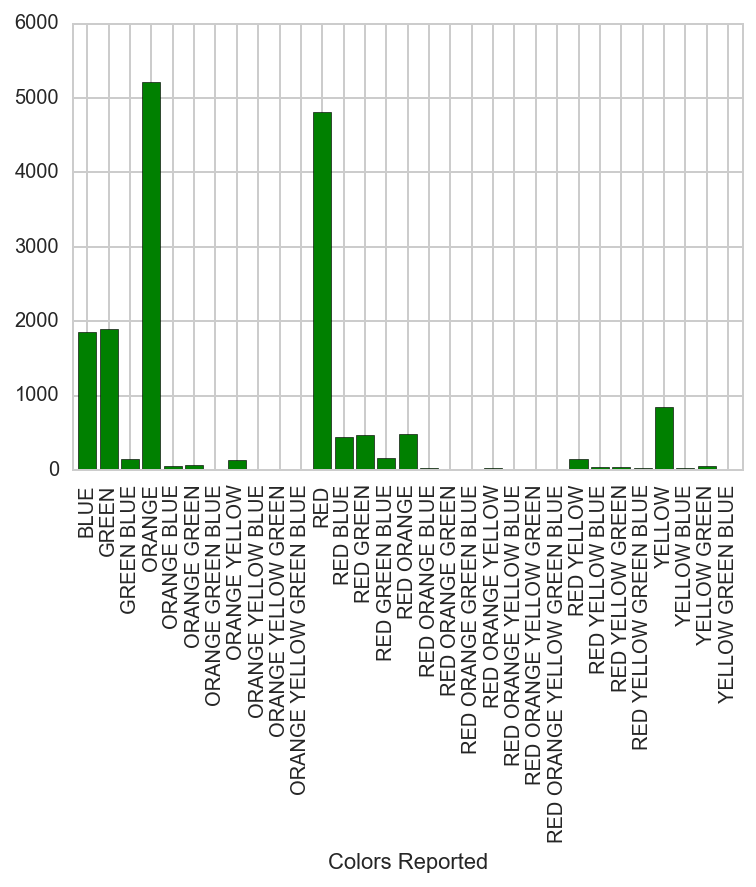

In [58]:
ufo.groupby(["Colors Reported"]).size().plot(kind='bar', color='g',width=0.85)
plt.show()

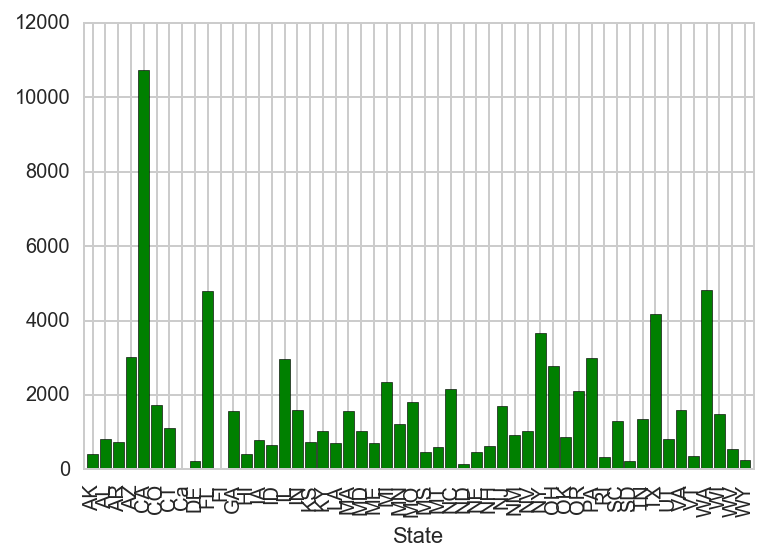

In [59]:
ufo.groupby(["State"]).size().plot(kind='bar', color='g',width=0.85)
plt.show()

### 9. Plot counts of sightings per City

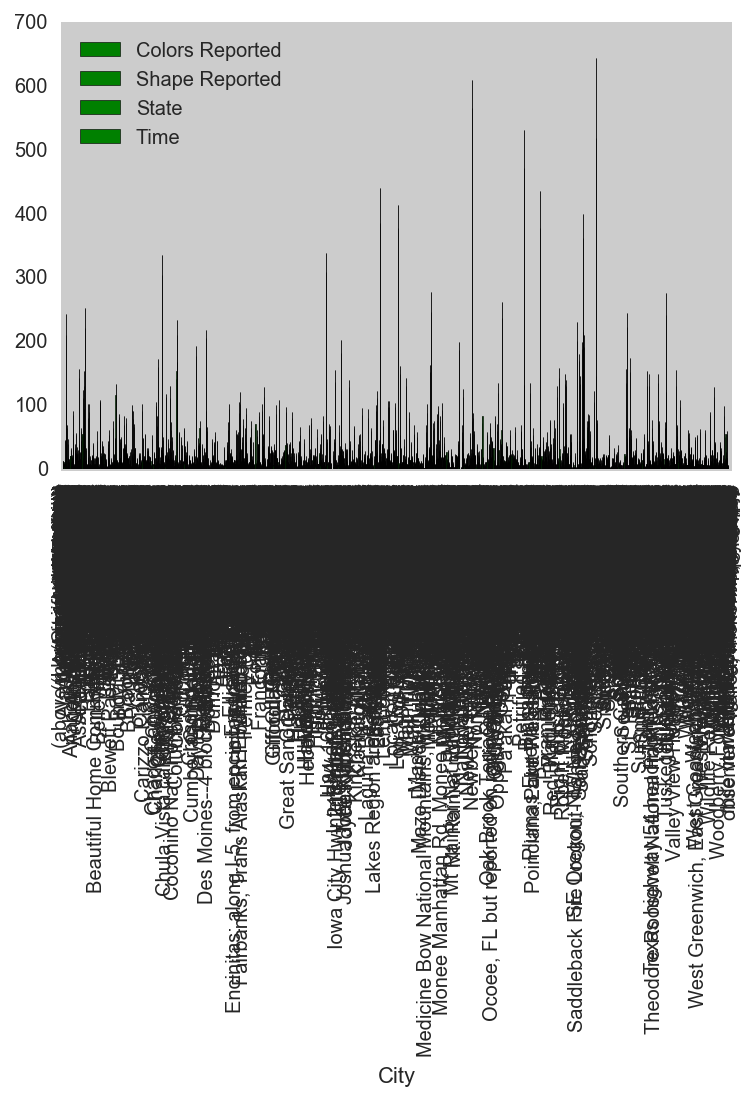

In [62]:
ufo.groupby(["City"]).shape().plot(kind='bar', color='g',width=0.85)
plt.show()

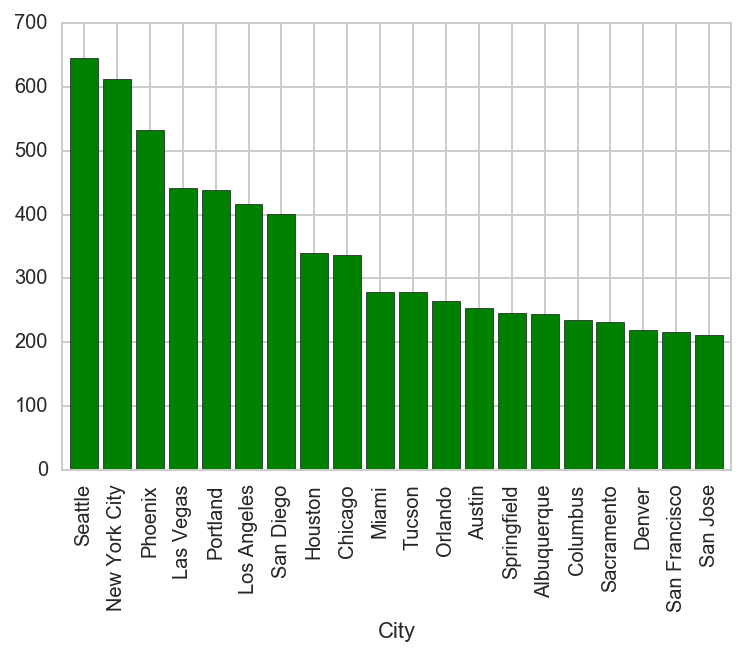

In [84]:
city_mask = ufo.groupby(['City'])[['City']].count().sort_values('City', ascending=0).add_prefix('Cnt_').head(20)
#city_mask
#ufo.groupby('City').count()
#ufo[city_mask].head(30)
city_mask["Cnt_City"].plot(kind='bar', color='g',width=.85)
plt.show()

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

In [92]:
ufo[cig_mask].groupby(['City'])[['Shape Reported']].count().sort_values('Shape Reported', ascending=0).add_prefix('Cig_').head(20)

,Cig_Shape Reported
City,
New York City,19
Los Angeles,18
Phoenix,16
Seattle,14
Sacramento,13
Springfield,13
San Diego,10
Chicago,10
Charlotte,9


---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [95]:
ufo.('Sh')

ufo.groupby(['State', 'Shape Reported'])[['Shape Reported']].count() #.nlargest(20)

AttributeError: Cannot access callable attribute 'nlargest' of 'DataFrameGroupBy' objects, try using the 'apply' method

### 13.  Bonus:  What are the top 20 shapes by City + State?


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art